#**PROBLEMA DE NEGOCIO**


---

##Revisar un site de venta de celulares y obtener los 7 productos con mayor valor de venta

#**1. Configuración del Ambiente**


---




In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
global productos,precios,marcas,df_productos
productos=[]
precios=[]
marcas=[]

#**2. Obtención de Datos (Scraping)**


---




In [2]:
def scraping(url):
  global productos,precios,marcas
  respuesta = requests.get(url)
  s = BeautifulSoup(respuesta.content, "lxml")

  prod = s.findAll('h2',{'class':'Text_Text__h_AF6 Text_MobileLabelXs__ER_cD Text_DesktopLabelSAtLarge__baj_g ProductCard_ProductCard_Name__LT7hv'})
  prec = s.findAll('p',{'class':'Text_Text__h_AF6 Text_MobileHeadingS__Zxam2'})

  for item in prod:
    productos.append(item.text.strip())
    if 'Apple' in item.text.strip():
      marcas.append('Apple')
    elif 'Samsung' in item.text.strip():
      marcas.append('Samsung')
    elif 'Xiaomi' in item.text.strip():
      marcas.append('Xiaomi')
    elif 'Motorola' in item.text.strip():
      marcas.append('Motorola')
    else:
      marcas.append('Otros')

  for item in prec:
    if 'Filtros' not in item.text.strip():
      precios.append(float(item.text.strip().replace("R$","").replace(".","").replace(",",".")))

In [5]:
for i in range(1,8):
  url = 'https://www.zoom.com.br/celular?page='+str(i)
  scraping(url)

tuplas = list(zip(marcas, productos, precios))
df_productos = pd.DataFrame(tuplas, columns=["marca", "producto", "precio"])

#**3. Visualización de Datos**


---




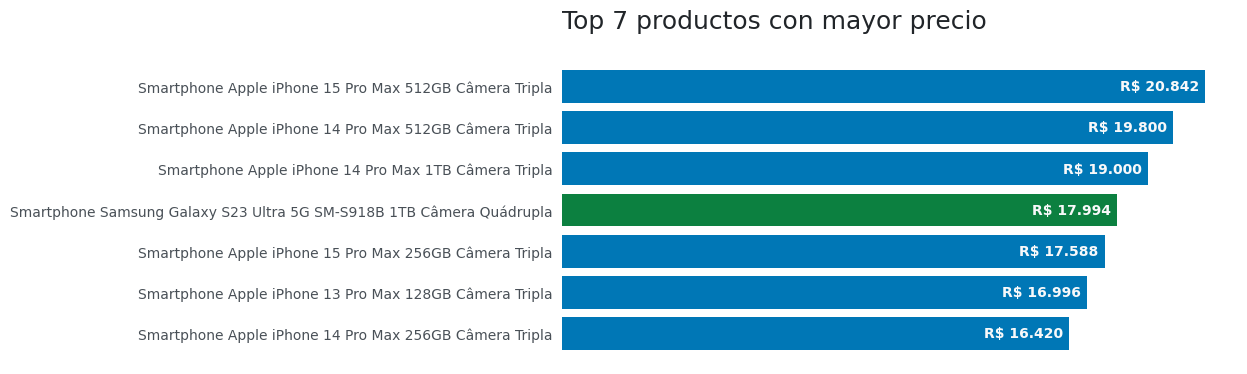

In [6]:
def visualizacion():
  global df_productos
  # Creando un df con los datos deseados
  df_top_precios = df_productos.copy()
  df_top_precios = df_top_precios[['producto','precio']]
  df_top_precios = df_top_precios.groupby(['producto']).aggregate("sum").sort_values('precio', ascending = False)
  df_top_precios = df_top_precios[:7]
  df_top_precios = df_top_precios.sort_values(by='precio', ascending=True)

  # Área del gráfico y tema de la visualización
  fig, ax = plt.subplots(figsize=(10,4))
  fig.subplots_adjust(right=0.8)

  # Definiendo los colores del gráfico
  colores = ['#0077b6', '#0077b6', '#0077b6', '#0C8040', '#0077b6', '#0077b6', '#0077b6']

  # Generando el gráfico de columnas
  ax.barh(df_top_precios.index, df_top_precios['precio'], color=colores, align='center')

  # Personalizando el gráfico
  ax.set_title('Top 7 productos con mayor precio', loc='left', fontsize=18, color='#212529', pad=20)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = '#495057')
  ax.yaxis.set_ticks_position('none')
  ax.yaxis.grid(False)
  ax.xaxis.grid(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  # Escribiendo los valores de cada barra en el gráfico
  for i, valor in enumerate(df_top_precios['precio']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 0.2e3
    ax.text(valor - offset, i, qtd, color= '#f8f9fa', fontsize=10, fontweight='bold', ha='right', va='center')

  return ax.get_figure()

fig = visualizacion()